## Univariate Non-Linear Transformations

In [1]:
# Using function like log, sin, exp to transform the relations between the feature and target as a linear one so that it helps the
# Regression and Neural Network Models

import numpy as np

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [2]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

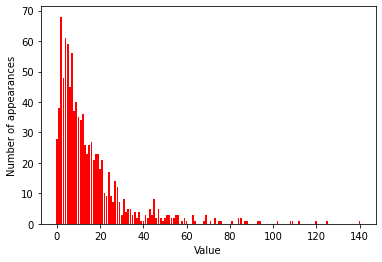

In [3]:
import matplotlib.pyplot as plt

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='r')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [5]:
# Linear Models can't handle this kind of distributions where there are many small ones and a few very large ones. But this kind of 
# distributions is quite normal.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [6]:
# The low R^2 score implies that the Ridge Regression could not capture the relationship between X and y. Applying a logarithmic 
# transformation can help. We have to compute log(X+1) because log(0) is not defined

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

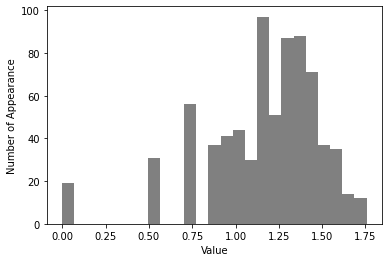

In [7]:
# After the transformatin the distribution of the data is less asymmetrical and does not have very large outliers.

plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of Appearance")
plt.xlabel("Value")

In [8]:
# Building a Ridge model on the new data provides a much better fit.

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.875


In [9]:
# Finding the transformation that works best on the model is an art. All the features had the same properties therefore we appied
# log transformations. But this is not always the case in the real world. 

# Read Page 189 to get a more Detailed Idea of where to apply these transformations and where not to.